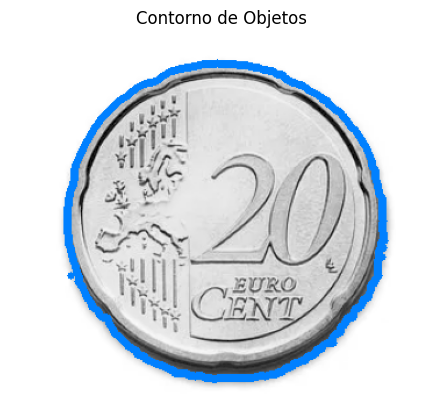

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ruta de la imagen
ruta_imagen = "C:/Users/luisl/OneDrive/Escritorio/PDI/Estancia Investigacion/Recursos/moneda.png"

# Leer la imagen en escala de grises
imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

if imagen is not None:
    # Filtro mediana --- Eliminar Ruido ---
    imagen_filtrada = cv2.medianBlur(imagen, 5)

    # Umbral adaptativo para resaltar objetos de interés
    umbral = cv2.adaptiveThreshold(imagen_filtrada, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Operaciones morfológicas para mejorar la forma de los objetos
    kernel = np.ones((5, 5), np.uint8)
    umbral = cv2.morphologyEx(umbral, cv2.MORPH_CLOSE, kernel)

    # Encontrar contornos
    contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar contornos en la imagen original
    imagen_contornos = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(imagen_contornos, contornos, -1, (0, 128, 255), 5)

    # --- Resultados --- #
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen_contornos)
    plt.title("Contorno de Objetos")
    plt.axis('off')
    plt.show()
else:
    print('No se pudo cargar la imagen en escala de grises. Verifica la ruta o el formato de la imagen')